In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

In [9]:
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('data').sheet1
data = worksheet.get_all_values()

In [10]:
dataset = pd.DataFrame(data[1:], columns=data[0])
dataset = dataset.astype({'Input':'float'})
dataset = dataset.astype({'Output':'float'})

In [11]:
dataset.head()

,Input,Output
0,1.0,11.0
1,2.0,22.0
2,3.0,33.0
3,4.0,44.0
4,5.0,55.0


In [12]:
X = dataset[['Input']].values
Y = dataset[['Output']].values

In [13]:
X,Y

(array([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.]]),
 array([[ 11.],
        [ 22.],
        [ 33.],
        [ 44.],
        [ 55.],
        [ 66.],
        [ 77.],
        [ 88.],
        [ 99.],
        [110.],
        [121.],
        [132.],
        [143.],
        [154.],
        [165.],
        [176.],
        [187.],
        [198.],
        [209.],
        [220.]]))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 20)

In [15]:
Scaler = MinMaxScaler()

In [16]:
Scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train_scale = Scaler.transform(x_train)

In [18]:
my_brain = Sequential([
    Dense(units = 4, activation = 'relu' , input_shape=[1]),
    Dense(units = 6),
    Dense(units = 1)

])

In [19]:
my_brain.compile(optimizer='rmsprop',loss='mse')

In [20]:
my_brain.fit(x=x_train_scale,y=y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 15393/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0072
Epoch 15527/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 15528/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 15529/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0072
Epoch 15530/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 15531/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 15532/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 15533/20000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 15534/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 15535/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 15536/20000
1/1 [=================

In [21]:
loss_df = pd.DataFrame(my_brain.history.history)

<Axes: >

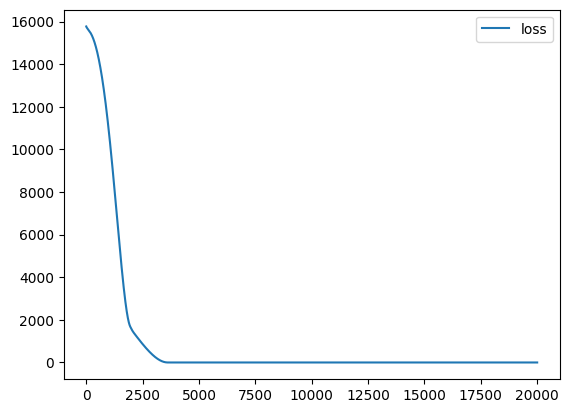

In [22]:
loss_df.plot()

In [23]:
x_test1 = Scaler.transform(x_test)

In [24]:
my_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 0.0088


0.00884020235389471

In [25]:
X_n1 = [[30]]

In [26]:
input_scaled = Scaler.transform(X_n1)

In [27]:
input_scaled

array([[1.52631579]])

In [28]:
my_brain.predict(input_scaled)

1/1 [==============================] - 0s 66ms/step


array([[329.6706]], dtype=float32)